In [3]:
from dateutil.parser import *
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## About the data

A good email marketing strategy is critical for every online retailer. To give you some perspective, 20% of online sales were driven by email in Q4 2015.

The problem is that most online retailers plan their email strategy without understanding what other companies are doing and what the underlying trends are. Let's explore the data collected by [MailCharts](https://www.mailcharts.com) to understand what the current email trends are.

The data we're about to explore was collected from January 1st, 2016 until December 31st, 2016. Before going any further, let's load our data...

In [4]:
# Since the data is over 100MB, it can't be uploaded to GitHub.
# Download the data from here: https://cl.ly/2Q0F3I2s1r0Y and save it in the data folder.
df = pd.read_csv('./data/mc-2016.csv')

In [5]:
print("Our dataset contains {} data points.".format(len(df)))
print("The columns available are: {} \n".format(list(df)))

print("Here's the format of our data:")
print(df.ix[0,:])

Our dataset contains 573198 data points.
The columns available are: ['company_id', 'guid', 'subject', 'from', 'reply_to', 'mobile_optimized', 'sent_at', 'animated', 'body_bytes', 'image_bytes'] 

Here's the format of our data:
company_id                                                        578
guid                             8564454b-f39e-c1bf-45b1-5166bf8bdb10
subject                                               My M&M's & More
from                [{"address":"noreply@r.groupon.com","name":"Gr...
reply_to                                                          NaN
mobile_optimized                                                    t
sent_at                                           2016-06-12 20:17:25
animated                                                            f
body_bytes                                                      53936
image_bytes                                                    175079
Name: 0, dtype: object


There's three question we want to answer and all of them are time-based (i.e. what's the trend).

1. Are companies dropping the notion of a `no-reply` email address?
1. Are more emails becoming mobile optimized?
1. Are GIFs more popular in emails?

In [6]:
# Let's parse the dates
# df['parsed_date'] = df.ix[0:10,'sent_at'].map(lambda x: parse(x).strftime('%B %Y'))
# df['parsed_date'] = df['sent_at'].map(lambda x: parse(x).strftime('%B %Y'))
# => That worked well for 10 examples, but for 500k rows it won't do. It's too slow!
# => Let's try another approach

df['month'] = df['sent_at'].map(lambda x: x.split('-')[1])
# print(df['month'])

To understand whether there is an overall trend among all companies or only a few, we break down the data by company per month.  The first thing we want to see is how many emails per month each company has sent.  First we do a simple groupby operation, then we construct a new dataframe consisting of month, company, and email count in order to render a boxplot that shows the diversity of companies' usage of the service per month.

In [19]:
company_emails_per_month = df.groupby(['month', 'company_id']).size()

In [8]:
# The return type for the above is a series with a multi-index. We want a dataframe with the size and the 
# two index columns broken out.  The next code constructs this.

month = []  # create a new "month" column
company = []  # create a new "company" column
email_counts = []  # create a new column for email counts.
for mo, co in company_emails_per_month.index:
    month.append(mo)
    company.append(co)
    email_counts.append(company_emails_per_month[mo, co])

company_emails_per_month = pd.DataFrame({'month': month, 'company': company, 'count': email_counts})

In this next plot, we can clearly see that a couple of companies send vastly more email than the others, which skews the mean and makes it difficult to see our data.

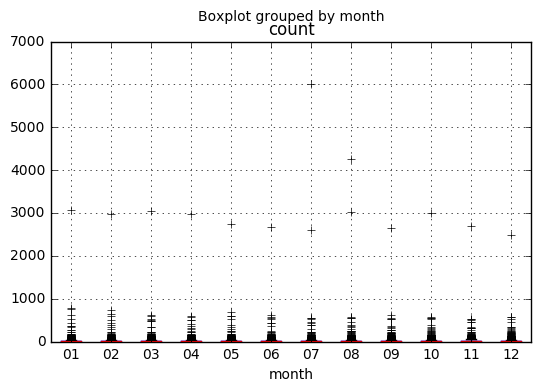

In [9]:
company_emails_per_month.boxplot(column='count', by='month')

To correct for this, we drop outliers.  Note that in the following plot, the medians are shown by the red line and the means are shown by the red square. The means are dominated by a few companies that send a lot of email, however the medians show that most companies stay in a much narrower range. In this graph, the means are all near the 75th percentile for each month's counts.

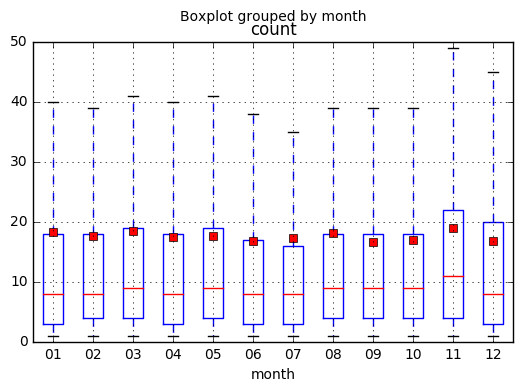

In [10]:
company_emails_per_month.boxplot(
    column='count',  # show only the count
    by='month',  # group by month
    showfliers=False,  # drop outliers from the graph
    showmeans=True  # show the means as red boxes.  The medians are shown by default.
)

Let's look at email volume for 2016.
month
01    38801
02    37443
03    40575
04    39494
05    41034
06    41847
07    52650
08    54299
09    50600
10    52727
11    60636
12    63092
dtype: int64


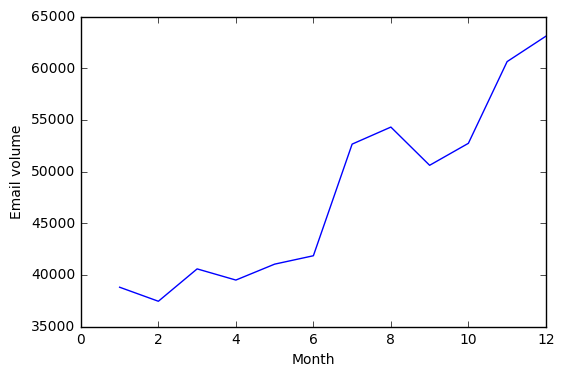

In [11]:
print("Let's look at email volume for 2016.")
monthly_volume = df.groupby(['month']).size()
print(monthly_volume)

plt.plot(monthly_volume)
plt.ylabel('Email volume')
plt.xlabel('Month')
plt.show()

month
01    2118
02    2133
03    2207
04    2267
05    2329
06    2508
07    3051
08    2994
09    3036
10    3118
11    3207
12    3768
Name: company_id, dtype: int64


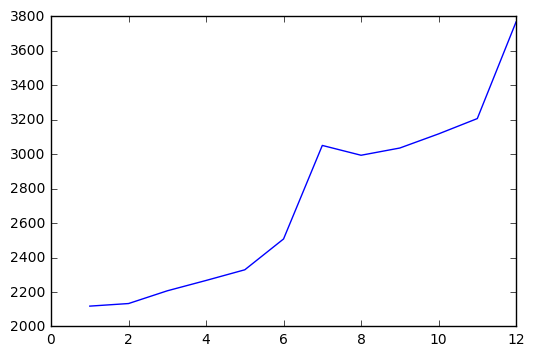

In [12]:
# As you can see, our email volume increases as more companies have been \
# added to MailCharts throughout the year.

monthly_senders = df.groupby(['month'])['company_id'].nunique()
print(monthly_senders)

plt.plot(monthly_senders)
plt.show()


In [13]:
# Mean email per company per month
volume_per_month = monthly_volume / monthly_senders
print(volume_per_month)


month
01    18.319641
02    17.554149
03    18.384685
04    17.421262
05    17.618720
06    16.685407
07    17.256637
08    18.135939
09    16.666667
10    16.910520
11    18.907390
12    16.744161
dtype: float64


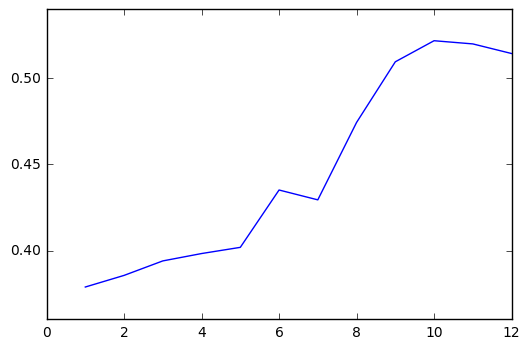

In [14]:
mobile_optimized = df[df['mobile_optimized'] == 't'].groupby(['month'])['mobile_optimized'].size()
mobile_optimized_rate = mobile_optimized / monthly_volume

# How could I show 2 columns, one for each month showing mobile optimization?
plt.plot(mobile_optimized_rate)
plt.show()

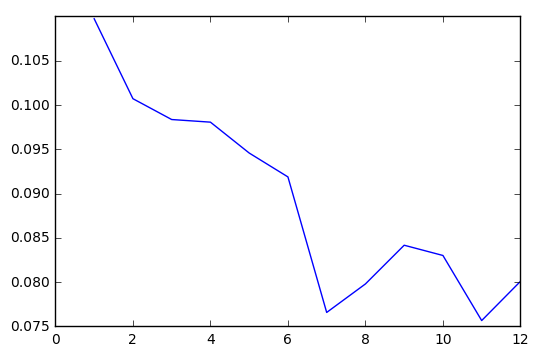

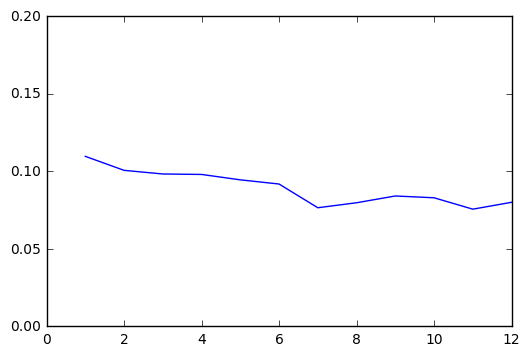

In [15]:
# Are companies dropping the notion of a no-reply email address?

no_reply = df[df['from'].str.contains('no.?reply')].groupby(['month']).size()
no_reply_trend = no_reply / monthly_volume

plt.plot(no_reply_trend)
plt.show()

plt.plot(no_reply_trend)
plt.axis([0,12,0,.2])
plt.show()



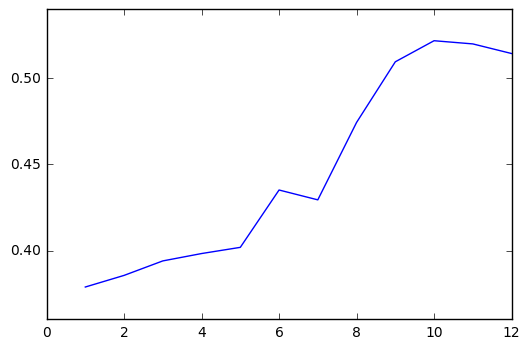

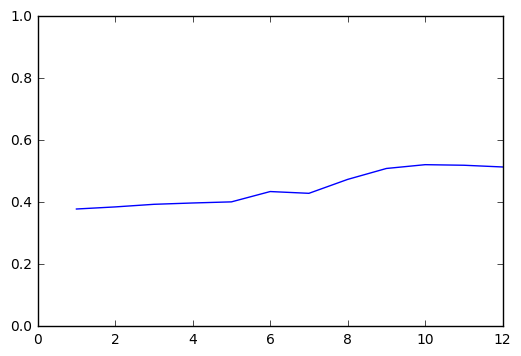

In [16]:
# Are more emails becoming mobile optimized?

mobile_optimized = df[df['mobile_optimized'] == 't'].groupby(['month']).size()
mobile_optimized_rate = mobile_optimized / monthly_volume

plt.plot(mobile_optimized_rate)
plt.show()

plt.plot(mobile_optimized_rate)
plt.axis([0,12,0,1])
plt.show()

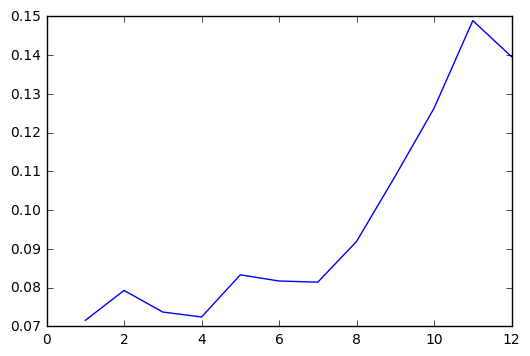

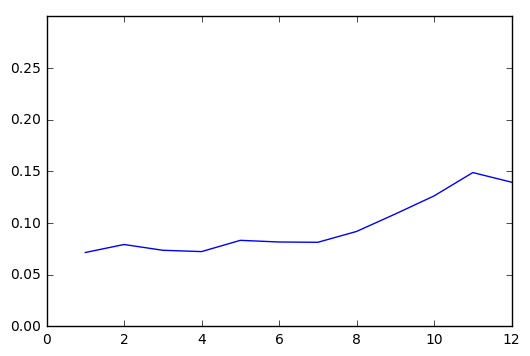

In [17]:
# Are GIFs more popular in emails?

gif = df[df['animated'] == 't'].groupby(['month']).size()
gif_rate = gif / monthly_volume
gif_rate

plt.plot(gif_rate)
plt.show()

plt.plot(gif_rate)
plt.axis([0,12,0,.3])
plt.show()